In [1]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Dimensions of dataset
data.shape

(5572, 5)

In [4]:
# Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Find null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# Remove 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
# Dictionary to rename columns
new_col_names = {
    'v1': 'Message_Type',
    'v2': 'Message_Content'
}

# Apply renaming
data.rename(columns=new_col_names, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Message_Type     5572 non-null   object
 1   Message_Content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# Import modules
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Perform label encoding
data['Message_Type'] = encoder.fit_transform(data['Message_Type'])
data

,Message_Type,Message_Content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
# Check for duplicates
data.duplicated().sum()

403

In [10]:
# Remove duplicate data
data.drop_duplicates(inplace=True)
data.shape

(5169, 2)

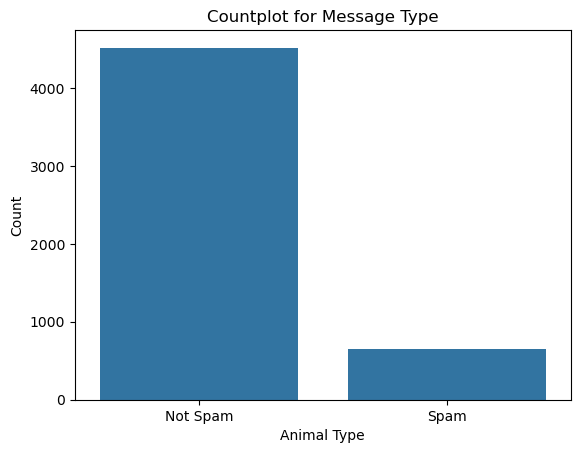

In [11]:
# Import modules
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'Message_Type' column
sns.countplot(x='Message_Type', data=data)
plt.title('Countplot for Message Type')
plt.xlabel('Animal Type')  
plt.ylabel('Count') 
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.show()

In [12]:
# Import Natural Language Toolkit
import nltk

In [13]:
# Find number of characters
data['Num_of_Chars'] = data['Message_Content'].apply(len)
data

,Message_Type,Message_Content,Num_of_Chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [14]:
# Identify number of words
from nltk.tokenize import word_tokenize
data['Num_of_Words'] = data['Message_Content'].apply(lambda x: len(nltk.word_tokenize(x)))
data

,Message_Type,Message_Content,Num_of_Chars,Num_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [15]:
# Identify number of sentences
from nltk.tokenize import sent_tokenize
data['Num_of_Sents'] = data['Message_Content'].apply(lambda x: len(nltk.sent_tokenize(x)))
data

,Message_Type,Message_Content,Num_of_Chars,Num_of_Words,Num_of_Sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [16]:
# Message type 0 statistical description (ham)
data[data['Message_Type'] == 0][['Num_of_Chars', 'Num_of_Words', 'Num_of_Sents']].describe()

,Num_of_Chars,Num_of_Words,Num_of_Sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
# Message type 0 statistical description (spam)
data[data['Message_Type'] == 1][['Num_of_Chars', 'Num_of_Words', 'Num_of_Sents']].describe()

,Num_of_Chars,Num_of_Words,Num_of_Sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


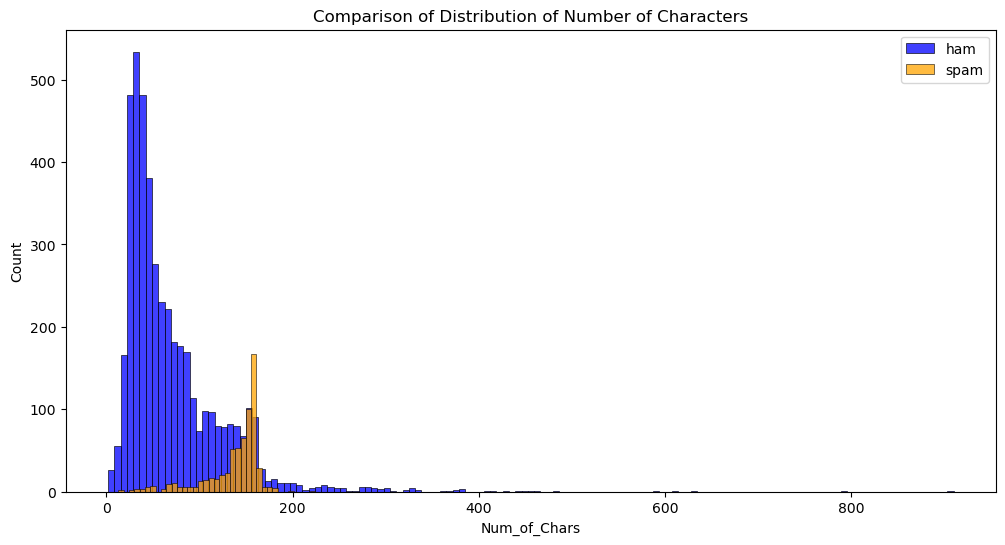

In [18]:
# Check number of characters for messages of both types
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Message_Type'] == 0]['Num_of_Chars'], color='blue')
sns.histplot(data[data['Message_Type'] == 1]['Num_of_Chars'], color='orange')
plt.title('Comparison of Distribution of Number of Characters')
plt.legend(labels=['ham', 'spam'], loc='upper right')
plt.show()

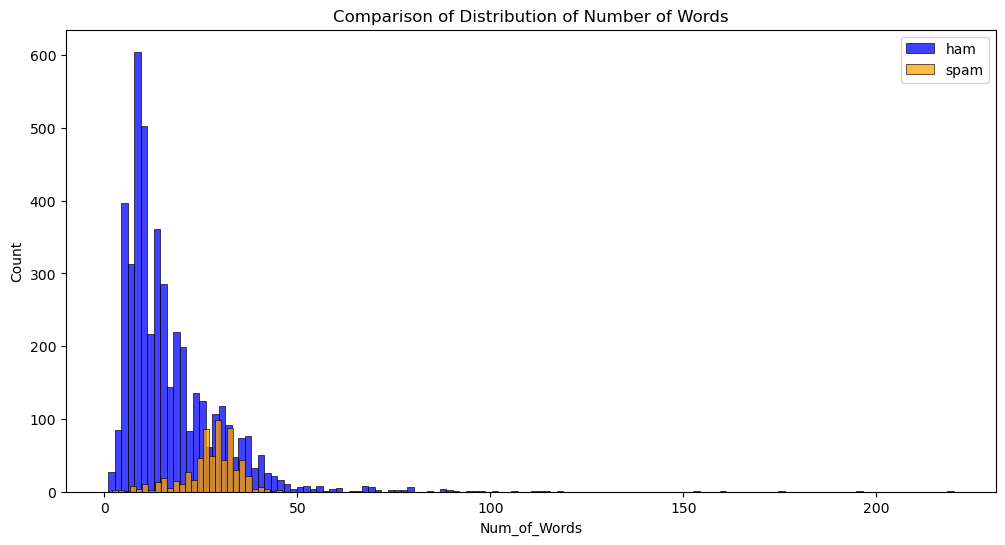

In [19]:
# Check number of words for messages of both types
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Message_Type'] == 0]['Num_of_Words'], color='blue')
sns.histplot(data[data['Message_Type'] == 1]['Num_of_Words'], color='orange')
plt.title('Comparison of Distribution of Number of Words')
plt.legend(labels=['ham', 'spam'], loc='upper right')
plt.show()

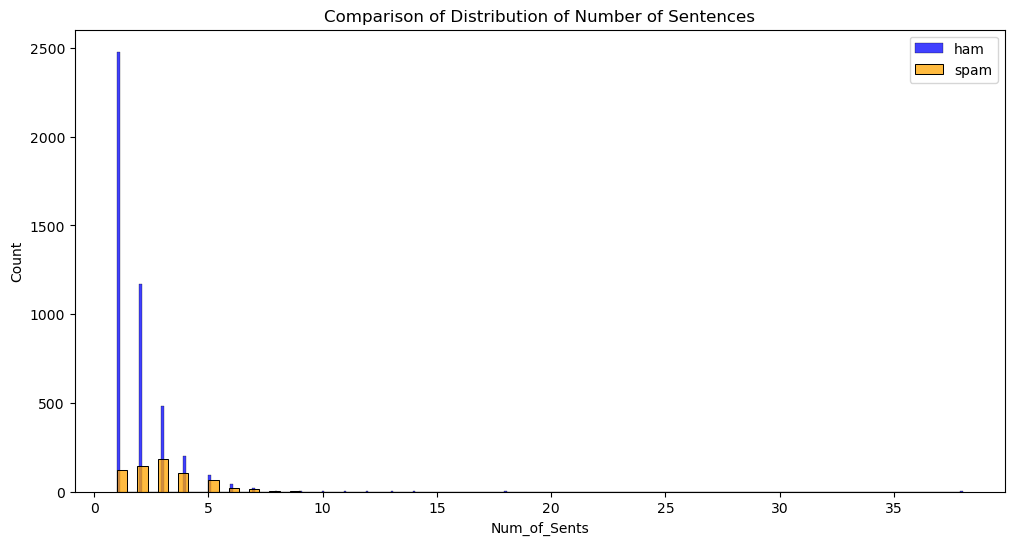

In [20]:
# Check number of sentences for messages of both types
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Message_Type'] == 0]['Num_of_Sents'], color='blue')
sns.histplot(data[data['Message_Type'] == 1]['Num_of_Sents'], color='orange')
plt.title('Comparison of Distribution of Number of Sentences')
plt.legend(labels=['ham', 'spam'], loc='upper right')
plt.show()

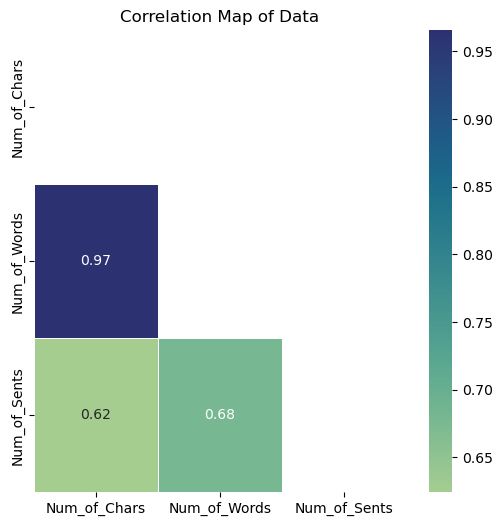

In [21]:
# Correlation map of data
import seaborn as sns
plt.figure(figsize=(6, 6))
data_temp = data.drop(['Message_Content', 'Message_Type'], axis=1)
mask = np.triu(np.ones_like(data_temp.corr()))
sns.heatmap(data_temp.corr(), annot=True, cmap="crest", linewidth=.5, mask=mask)
plt.title('Correlation Map of Data')
plt.show()

In [22]:
# Drop columns with high correlation coefficients
data.drop(['Num_of_Words', 'Num_of_Sents'], axis=1, inplace=True)
data

,Message_Type,Message_Content,Num_of_Chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
# Transform text
def text_transform(message):
    
    # Change to lowercase
    message = message.lower() 
    
    # Word tokenization
    message = nltk.word_tokenize(message)
    
    # Check for alphanumeric data
    y = [] 
    for i in message:
        if i.isalnum():
            y.append(i)
        y.clear()
        
    # Check punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()
    
    # Perform stemming
    for i in message:
        y.append(ps.stem(i))
    
    # Return important words
    return " ".join(y)

In [24]:
# Determine stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# Identify punctuation marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# Initialize stemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [27]:
# Perform message transformation
data['Transformed_Message'] = data['Message_Content'].apply(text_transform)
data

,Message_Type,Message_Content,Num_of_Chars,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah n't think goe usf live around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u. u å£750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,37,ì_ b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti mood ... suggest
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitch act like 'd interest buy someth els ...


In [28]:
# Perform TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=3000) 

# Apply vectorization
x = tfidf.fit_transform(data['Transformed_Message']).toarray()

# Output data
y = data['Message_Type'].values

In [29]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Train data dimensions: {x_train.shape, y_train.shape}")
print(f"Test data dimensions: {x_test.shape, y_test.shape}")

Train data dimensions: ((4135, 3000), (4135,))
Test data dimensions: ((1034, 3000), (1034,))


In [30]:
# Import module
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
mnb = MultinomialNB()

# Train the model
mnb.fit(x_train, y_train)

MultinomialNB()

In [31]:
# Perform predictions
y_pred = mnb.predict(x_test)

# Import modules
from sklearn.metrics import accuracy_score, precision_score

# Compute accuracy
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

# Compute precision
precision = precision_score(y_pred, y_test)
print(f"Precision: {precision}")

Accuracy: 0.9758220502901354
Precision: 0.8344827586206897
